# 特征工程

**1、构建基准模型**

In [1]:
# ----Baseline model 基准模型
import pandas as pd

# 预测Kickstarter项目是否能成功
ks = pd.read_csv('./datasets/kickstarter-projects/ks-projects-201801.csv',
                parse_dates=['deadline', 'launched'])
ks.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [2]:
# ---目标列预处理

# 查看目标的不同种类
pd.unique(ks.state)

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [3]:
# 汇总不同state的个数
ks.groupby('state')['ID'].count()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

In [4]:
# 对数据进行简单的预处理
# 排除仍然‘live’的项目
ks = ks.query('state!="live"')

# 增加outcome列，对应state，"successful"的对应1，其它对应0
ks = ks.assign(outcome=(ks['state']=='successful').astype(int))

In [5]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,outcome
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


将`launched`特征转换为类别特征，以便在模型中使用。`launched`列是作为timestamp数据加载的，可以通过`.dt`属性访问它包含的日期和时间。

In [6]:
ks = ks.assign(hour=ks.launched.dt.hour,
              day=ks.launched.dt.day,
              month=ks.launched.dt.month,
              year=ks.launched.dt.year)
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,outcome,hour,day,month,year
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,12,11,8,2015
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,4,2,9,2017
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0,12,1,2013
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,3,17,3,2012
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,8,4,7,2015


In [7]:
# 使用`LabelEncoder`将类别变量`category`,`currency`,`country`转换为整数。
from sklearn.preprocessing import LabelEncoder

cat_features=['category','currency','country']
encoder = LabelEncoder()

# 对每列使用LabelEncoder进行编码
encoded = ks[cat_features].apply(encoder.fit_transform)
encoded.head(10)

,category,currency,country
0,108,5,9
1,93,13,22
2,93,13,22
3,90,13,22
4,55,13,22
5,123,13,22
6,58,13,22
7,41,13,22
8,113,13,22
9,39,13,22


In [8]:
# 整合用来训练模型的数据
# `ks`和`encoded`有相同的索引，可以很容易将它们join
data = ks[['goal','hour','day','month','year','outcome']].join(encoded)
data.head()

,goal,hour,day,month,year,outcome,category,currency,country
0,1000.0,12,11,8,2015,0,108,5,9
1,30000.0,4,2,9,2017,0,93,13,22
2,45000.0,0,12,1,2013,0,93,13,22
3,5000.0,3,17,3,2012,0,90,13,22
4,19500.0,8,4,7,2015,0,55,13,22


In [9]:
# 手动的将数据分为训练数据、验证数据、测试数据
valid_fraction = 0.1
valid_size = int(len(data) * valid_fraction)
train = data[:-2 * valid_size]
valid = data[-2 * valid_size:-valid_size]
test = data[-valid_size:]

# 通常期望的是每一部分的数据中目标种类的比例相同。
# 打印出每部分数据中outcome为`successful`的比例
for each in [train, valid, test]:
    print(f"Outcome fraction = {each.outcome.mean():.4f}")

Outcome fraction = 0.3570
Outcome fraction = 0.3539
Outcome fraction = 0.3542


由于事先对数据进行了很好的随机化（randomized）处理，每个数据集都有35%左右的`outcome`为*successful*。

一种自动进行随机化的方式是`sklearn.model_selection.StratifiedShuffleSplit`。

**使用LightGBM模型来训练一个基准模型**

**LightGBM(Light Gradient Boosting Machine)**是一种基于树的模型，通常能够提供最佳性能表现，即使是和XGBoost相比。并且模型训练相对较快。此处不作超参调试，着重点是表现在进行特征工程时的模型性能提升。

In [13]:
import lightgbm as lgb

feature_cols = train.columns.drop('outcome')

dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

param = {'num_leaves':64, 'objective':'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10, verbose_eval=False)

In [14]:
# 预测和验证
from sklearn import metrics
ypred = bst.predict(test[feature_cols])
score = metrics.roc_auc_score(test['outcome'], ypred)

print(f"Test AUC score:{score}")

Test AUC score:0.747615303004287


**2、类别变量编码方法（Categorical Encodings）**

包括：count encoding，target encoding（and variations），singular value decomposition。

In [29]:
# ----重构上节的基准模型
ks = pd.read_csv('./datasets/kickstarter-projects/ks-projects-201801.csv',
                parse_dates=['deadline', 'launched'])
# 移除仍然活跃的项目
ks = ks.query('state != "live"')
# 增加outcome列，1表示state为successful的项目，0表示其它state的项目
ks= ks.assign(outcome=(ks['state']=='successful').astype('int'))
# 时间戳特征转换
ks=ks.assign(hour=ks.launched.dt.hour,
            day=ks.launched.dt.day,
            month=ks.launched.dt.month,
            year=ks.launched.dt.year)

# Label encoding
cat_features = ['category','currency','country']
encoder=LabelEncoder()
encoded=ks[cat_features].apply(encoder.fit_transform)

data_cols=['goal','hour','day','month','year','outcome']
baseline_data=ks[data_cols].join(encoded)

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction=0.1
    valid_size=int(len(dataframe) * valid_fraction)
    train=dataframe[:-valid_size*2]
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    return train,valid,test

def train_model(train,valid):
    feature_cols=train.columns.drop('outcome')
    
    dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])
    param = {'num_leaves':64, 'objective':'binary',
            'metric':'auc', 'seed':7}
    print('Training model!')
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid],
                   early_stopping_rounds=10, verbose_eval=False)
    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['outcome'],valid_pred)
    print(f"Validation AUC score:{valid_score:.4f}")
    return bst

train,valid, _= get_data_splits(baseline_data)
bst = train_model(train, valid)

Training model!
Validation AUC score:0.7467


**Count Encoding**

Count Encoding（计数编码）用数据集中每个类别值出现的次数替换该类别值。

出现次数少的值趋于有相似的数量（比如1或2），在预测的时候可以将它们分为一类。出现次数多的值与其它值不大可能有相近的数量，所以它们会有各自的分组。

这里用的是`categorical-encoding`包（该包依赖`featuretools`包，也可以学习下的）。

In [30]:
import category_encoders as ce

cat_features = ['category','currency','country']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(ks[cat_features])

data=baseline_data.join(count_encoded.add_suffix('_count'))

train,valid,test = get_data_splits(data)
bst = train_model(train, valid)

c:\program files\python\lib\site-packages\category_encoders\count.py:255: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  X.loc[:, self.cols] = X.fillna(value=pd.np.nan)


Training model!
Validation AUC score:0.7486


In [31]:
train.head()

,goal,hour,day,month,year,outcome,category,currency,country,category_count,currency_count,country_count
0,1000.0,12,11,8,2015,0,108,5,9,1362,33853,33393
1,30000.0,4,2,9,2017,0,93,13,22,5174,293624,290887
2,45000.0,0,12,1,2013,0,93,13,22,5174,293624,290887
3,5000.0,3,17,3,2012,0,90,13,22,15647,293624,290887
4,19500.0,8,4,7,2015,0,55,13,22,10054,293624,290887


增加了count encoding特征将验证结果由0.7467提高到了0.7486，只是一个轻微的提升。

**Traget Encoding（目标编码）**

监督编码（supervised encoding），用labels（target）来转换类别特征。

Target Encoding用某个特征值对应的目标的平均值来替换类别值。

通常会结合整个数据集的目标概率来减少出现频率少的值的方差。这种技术用目标来创建新的特征，如果把验证数据或者测试数据包括进target encoding会造成某种形式的目标泄漏；应该是仅仅从训练数据进行target encoding，并将训练的transformer应用到其它数据集上。

In [32]:
cat_features = ['category','currency','country']
target_enc = ce.TargetEncoder(cols=cat_features)

train,valid,_ = get_data_splits(data)
# 用训练数据拟合编码transformer
target_enc.fit(train[cat_features], train['outcome'])
#
train = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))

bst=train_model(train, valid)

Training model!
Validation AUC score:0.7491


In [33]:
train.head()

,goal,hour,day,month,year,outcome,category,currency,country,category_count,currency_count,country_count,category_target,currency_target,country_target
0,1000.0,12,11,8,2015,0,108,5,9,1362,33853,33393,0.360190,0.357122,0.361636
1,30000.0,4,2,9,2017,0,93,13,22,5174,293624,290887,0.384615,0.373392,0.376631
2,45000.0,0,12,1,2013,0,93,13,22,5174,293624,290887,0.384615,0.373392,0.376631
3,5000.0,3,17,3,2012,0,90,13,22,15647,293624,290887,0.412655,0.373392,0.376631
4,19500.0,8,4,7,2015,0,55,13,22,10054,293624,290887,0.302625,0.373392,0.376631


**CatBoost Encoding**

与target encoding类似，也是基于某个类别值的目标概率。但是，CatBoost，对于每行仅仅根据它前面那行来计算目标概率。

In [34]:
cat_features = ['category','currency','country']
target_enc = ce.CatBoostEncoder(cols=cat_features)

train,valid,_ = get_data_splits(data)
# 用训练数据拟合编码transformer
target_enc.fit(train[cat_features], train['outcome'])
#
train = train.join(target_enc.transform(train[cat_features]).add_suffix('_cb'))
valid = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_cb'))

bst=train_model(train, valid)

Training model!
Validation AUC score:0.7492


In [35]:
train.head()

,goal,hour,day,month,year,outcome,category,currency,country,category_count,currency_count,country_count,category_cb,currency_cb,country_cb
0,1000.0,12,11,8,2015,0,108,5,9,1362,33853,33393,0.360187,0.357122,0.361636
1,30000.0,4,2,9,2017,0,93,13,22,5174,293624,290887,0.384609,0.373392,0.376631
2,45000.0,0,12,1,2013,0,93,13,22,5174,293624,290887,0.384609,0.373392,0.376631
3,5000.0,3,17,3,2012,0,90,13,22,15647,293624,290887,0.412651,0.373392,0.376631
4,19500.0,8,4,7,2015,0,55,13,22,10054,293624,290887,0.302632,0.373392,0.376631


In [2]:
# -----例子2
# 读取parquet文件要先安装`pyarrow`包
# 看多app的广告，是否会下载app的预测
clicks=pd.read_parquet('./datasets/feature-engineering-data/baseline_data.pqt')
print(clicks.shape)
clicks.head()

(2300561, 12)


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,27226,3,1,13,120,2017-11-06 15:13:23,None,0,6,15,13,23
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,41,7
2,1047,6,1,13,157,2017-11-06 15:42:32,None,0,6,15,42,32
3,76270,3,1,13,120,2017-11-06 15:56:17,None,0,6,15,56,17
4,57862,3,1,13,120,2017-11-06 15:57:01,None,0,6,15,57,1


In [3]:
import lightgbm as lgb
import category_encoders as ce
from sklearn import metrics

def get_data_splits(dataframe, valid_fraction=0.1):
    """ 把数据集分为训练、测试、验证三部分。
    首先按照"click_time"排序（因为是对未来的预测，防止目标泄漏）
    """
    dataframe = dataframe.sort_values('click_time')
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

def train_model(train, valid, test=None, feature_cols=None):
    # 默认将'click_time', 'attributed_time','is_attributed'三列删除，
    # 'is_attributed'为目标列，'attributed_time'为下载时间
    if feature_cols is None:
        feature_cols = train.columns.drop(['click_time', 'attributed_time',
                                           'is_attributed'])

    dtrain = lgb.Dataset(train[feature_cols], label=train['is_attributed'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['is_attributed'])
    
    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    num_round = 1000
    print("Training model!")
    bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], 
                    early_stopping_rounds=20, verbose_eval=False)
    
    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['is_attributed'], valid_pred)
    print(f"Validation AUC score: {valid_score}")
    
    if test is not None: 
        test_pred = bst.predict(test[feature_cols])
        test_score = metrics.roc_auc_score(test['is_attributed'], test_pred)
        return bst, valid_score, test_score
    else:
        return bst, valid_score

In [4]:
# 训练基准模型
print("Baseline model")
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid)

Baseline model
Training model!
Validation AUC score: 0.9622743228943659


In [5]:
# 使用count encoding
cat_features = ['ip', 'app', 'device', 'os', 'channel']
train, valid, test = get_data_splits(clicks)

count_enc = ce.CountEncoder(cols=cat_features)

count_enc.fit(train[cat_features])

train_encoded = train.join(count_enc.transform(train[cat_features]).add_suffix('_count'))
valid_encoded = valid.join(count_enc.transform(valid[cat_features]).add_suffix('_count'))

_ = train_model(train_encoded, valid_encoded)

c:\program files\python\lib\site-packages\category_encoders\count.py:255: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  X.loc[:, self.cols] = X.fillna(value=pd.np.nan)


Training model!
Validation AUC score: 0.9653051135205329


In [6]:
# 使用Traget encoding
cat_features = ['ip', 'app', 'device', 'os', 'channel']
train, valid, test = get_data_splits(clicks)

target_enc = ce.TargetEncoder(cols=cat_features)

target_enc.fit(train[cat_features],train['is_attributed'])

train_encoded = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid_encoded = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))

_ = train_model(train_encoded, valid_encoded)

Training model!
Validation AUC score: 0.9540530347873288


Target encoding是尝试测量类别特征每个值对应的目标的平均值（population mean）。对于数量很少的类别值，估算出来的平均值与“真实的”平均值会相差很远，变化会很大。

由于每个`ip`对应的数据都很少，所以将`ip`列为目标编码特征，可能会形成编码的干扰，训练出的模型会强烈的依赖这个特征（唯一性比较强对预测结果决定性大）。会导致对于训练数据中未出现过的ip地址表现很差。所以，下面的类别编码将移除`ip`。

In [7]:
cat_features = ['app', 'device', 'os', 'channel']
train, valid, test = get_data_splits(clicks)

cb_enc = ce.CatBoostEncoder(cols=cat_features)

cb_enc.fit(train[cat_features],train['is_attributed'])

train_encoded = train.join(cb_enc.transform(train[cat_features]).add_suffix('_cb'))
valid_encoded = valid.join(cb_enc.transform(valid[cat_features]).add_suffix('_cb'))

_ = train_model(train_encoded , valid_encoded )

Training model!
Validation AUC score: 0.962868024575231


**3、Feature Generation**

从源数据中创造新的特征是改进模型的最好方法之一。

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import LabelEncoder

register_matplotlib_converters()

ks = ks.query('state != "live"')

# Add outcome column, "successful" == 1, others are 0
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))

ks = ks.assign(hour=ks.launched.dt.hour,
               day=ks.launched.dt.day,
               month=ks.launched.dt.month,
               year=ks.launched.dt.year)

# Label encoding
cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
encoded = ks[cat_features].apply(encoder.fit_transform)

data_cols = ['goal', 'hour', 'day', 'month', 'year', 'outcome']
baseline_data = ks[data_cols].join(encoded)

**3.1、interactions（相互作用）**

把类别变量连结在一起创建出新的特征。

比如国家“CA”和类别“Music”连结创建新的值“CA_Music”。那么这将是一个新的特征可以提供了类别变量之间的关系。

一般，可以用任意数量的类别特征进行来创建相互作用特征；但是连结数量越多，效果可能递减。

In [9]:
# 使用pandas可以简单的将两列连结
interactions = ks['category'] + '_' + ks['country']
print(interactions.head(10))

0            Poetry_GB
1    Narrative Film_US
2    Narrative Film_US
3             Music_US
4      Film & Video_US
5       Restaurants_US
6              Food_US
7            Drinks_US
8    Product Design_US
9       Documentary_US
dtype: object


In [10]:
# 然后把这个相互作用特征进行label encode，并加入到数据集中
label_enc=LabelEncoder()
data_interaction=baseline_data.assign(category_country=label_enc.fit_transform(interactions))
data_interaction.head()

,goal,hour,day,month,year,outcome,category,currency,country,category_country
0,1000.0,12,11,8,2015,0,108,5,9,1900
1,30000.0,4,2,9,2017,0,93,13,22,1630
2,45000.0,0,12,1,2013,0,93,13,22,1630
3,5000.0,3,17,3,2012,0,90,13,22,1595
4,19500.0,8,4,7,2015,0,55,13,22,979


**3.2、上周内的项目数量（Number of projects in the last week）**

In [11]:
# 使用ks.launched作为索引，ks.index作为值，然后按照创建的Series的索引排序
launched = pd.Series(ks.index, index=ks.launched, name="count_7_days").sort_index()
launched.head(20)

launched
1970-01-01 01:00:00     94579
1970-01-01 01:00:00    319002
1970-01-01 01:00:00    247913
1970-01-01 01:00:00     48147
1970-01-01 01:00:00     75397
1970-01-01 01:00:00      2842
1970-01-01 01:00:00    273779
2009-04-21 21:02:48    169268
2009-04-23 00:07:53    322000
2009-04-24 21:52:03    138572
2009-04-25 17:36:21    325391
2009-04-27 14:10:39    122662
2009-04-28 13:55:41    213711
2009-04-29 02:04:21    345606
2009-04-29 02:58:50    235255
2009-04-29 04:37:37     98954
2009-04-29 05:26:32    342226
2009-04-29 06:43:44    275091
2009-04-29 13:52:03    284115
2009-04-29 22:08:13     32898
Name: count_7_days, dtype: int64

由于Series的索引是时间，可以使用`.rolling`来选择时间段作为窗口。比如，`launched.rolling('7d')`创建一个滚动的窗口——包含当前索引代表的时间的过去7天内的所有数据。这中窗口会包含当前记录，所以，如果只统计当前记录之前的记录，应该减1.

launched
1970-01-01 01:00:00     0.0
1970-01-01 01:00:00     1.0
1970-01-01 01:00:00     2.0
1970-01-01 01:00:00     3.0
1970-01-01 01:00:00     4.0
1970-01-01 01:00:00     5.0
1970-01-01 01:00:00     6.0
2009-04-21 21:02:48     0.0
2009-04-23 00:07:53     1.0
2009-04-24 21:52:03     2.0
2009-04-25 17:36:21     3.0
2009-04-27 14:10:39     4.0
2009-04-28 13:55:41     5.0
2009-04-29 02:04:21     5.0
2009-04-29 02:58:50     6.0
2009-04-29 04:37:37     7.0
2009-04-29 05:26:32     8.0
2009-04-29 06:43:44     9.0
2009-04-29 13:52:03    10.0
2009-04-29 22:08:13    11.0
Name: count_7_days, dtype: float64


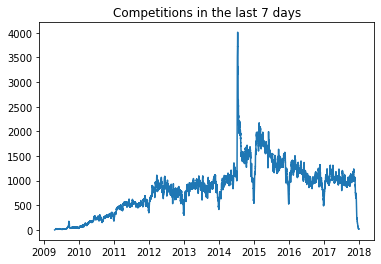

In [15]:
# 创建窗口，统计每个窗口的数量
count_7_days=launched.rolling('7d').count()-1
print(count_7_days.head(20))

# 忽略日期错误的几条记录（‘1970-------’）
plt.plot(count_7_days[7:])
plt.title("Competitions in the last 7 days");

In [16]:
# 把索引加回来，以便和训练数据集进行连接
count_7_days.index=launched.values
count_7_days=count_7_days.reindex(ks.index)
count_7_days.head(10)

0    1409.0
1     957.0
2     739.0
3     907.0
4    1429.0
5    1284.0
6    1119.0
7    1391.0
8    1043.0
9    3199.0
Name: count_7_days, dtype: float64

In [17]:
# 和训练数据连接
baseline_data.join(count_7_days).head(10)

,goal,hour,day,month,year,outcome,category,currency,country,count_7_days
0,1000.0,12,11,8,2015,0,108,5,9,1409.0
1,30000.0,4,2,9,2017,0,93,13,22,957.0
2,45000.0,0,12,1,2013,0,93,13,22,739.0
3,5000.0,3,17,3,2012,0,90,13,22,907.0
4,19500.0,8,4,7,2015,0,55,13,22,1429.0
5,50000.0,13,26,2,2016,1,123,13,22,1284.0
6,1000.0,18,1,12,2014,1,58,13,22,1119.0
7,25000.0,20,1,2,2016,0,41,13,22,1391.0
8,125000.0,18,24,4,2014,0,113,13,22,1043.0
9,65000.0,21,11,7,2014,0,39,13,22,3199.0


**3.3、距离上一个同一类别的项目的时间（Time since the last project in the same category）**

相同类别的项目会竞争捐赠者吗？如果要买一个视频游戏并且刚刚发行了另一款同类游戏，用户可能没有足够的钱了。通过计算距离上一个同类项目的发行时间获取这个特征。

一个进行分组内操作的方便操作是使用`.groupby`，然后`.transform`。`.transform`方法以函数为参数，把每个分组的Series或Dataframe传递给函数进行处理。这一过程**返回的Dataframe和源Dataframe相同索引**。

In [18]:
def time_since_last_project(series):
    # 返回相邻记录时间差（小时）
    return series.diff().dt.total_seconds() / 3600.
df = ks[['category','launched']].sort_values('launched')
timedeltas = df.groupby('category').transform(time_since_last_project)
timedeltas.head(20)

,launched
94579,NaN
319002,NaN
247913,NaN
48147,NaN
75397,NaN
2842,0.000000
273779,NaN
169268,NaN
322000,NaN
138572,NaN


如果记录是类别分组中的第一条，返回结果就是`NaN`。需要将这些值用平均值或中位值替换。

In [21]:
timedeltas=timedeltas.fillna(timedeltas.median()).reindex(baseline_data.index)
timedeltas.head(20)

,launched
0,18.606111
1,5.592778
2,1.313611
3,0.635000
4,16.661389
5,2.629722
6,0.367500
7,12.286111
8,14.243611
9,0.174722


Text(0.5, 1.0, 'Goal')

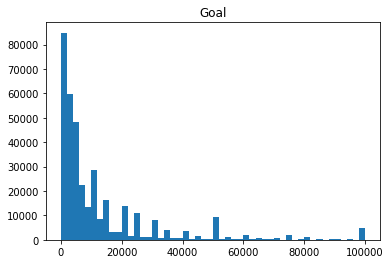

In [24]:
plt.hist(ks.goal, range=(0,100000), bins=50)
plt.title('Goal')

**3.4、转换数值特征（Transforming numerical features）**

从`goal`的值的分布可以看出大多数项目的`goal`小于5000 USD。但是`goal`有一个长尾——直到100000。当特征呈现正态分布时某些模型表现最好，所以转换`goal`的值可能会有帮助。常用的选择是平方根（square root）和自然对数（natural logarithm）。这些转换也能约束异常值（constrain outliers）。

Text(0.5, 1.0, 'Sqrt(Goal)')

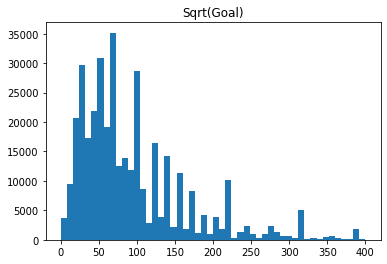

In [26]:
import numpy as np
plt.hist(np.sqrt(ks.goal),range=(0,400), bins=50)
plt.title('Sqrt(Goal)')

Text(0.5, 1.0, 'Log(Goal)')

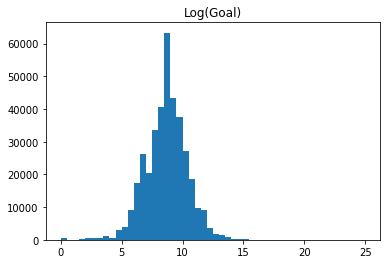

In [27]:
plt.hist(np.log(ks.goal),range=(0,25), bins=50)
plt.title('Log(Goal)')

对数转换对于树型模型是没有用的，因为基于树的模型是尺度不变的（scale invariant）。但是，对数转换对于线性模型（linear model）或者神经网络（neural network）是有用的。

还有诸如平方（square）、幂（power）、指数（exponentials）……等转换。这些对于模型辨别（model discriminate）有帮助，比如SVM内核的模型。辨别是否有用还要看经验。一种方法是，创建一组新的特征，然后使用特征选择算法进行选择。

神经网络模型需要输入的数值特征是标准化的（standardized），即，特征需要被缩放为平均值为0并且标准差是1。使用`sklearn.preprocessing.StandardScaler`可以实现标准化。

In [89]:
# ----特征生成：例子2
import itertools
from sklearn.preprocessing import LabelEncoder
click_data = pd.read_csv('./datasets/feature-engineering-data/train_sample.csv', parse_dates=['click_time'])

print(click_data.head(10))

click_times = click_data['click_time']
clicks = click_data.assign(day=click_times.dt.day.astype('uint8'),
                          hour=click_times.dt.hour.astype('uint8'),
                          minute=click_times.dt.minute.astype('uint8'),
                          second=click_times.dt.second.astype('uint8'))

print(clicks.head(10))

# 类别特征列
cat_features=['ip','app','device','os','channel']
# 类别特征Label encode
for feature in cat_features:
    label_encoder = LabelEncoder()
    clicks[feature] = label_encoder.fit_transform(clicks[feature])

print(clicks.head(10))

       ip  app  device  os  channel          click_time      attributed_time  \
0   89489    3       1  13      379 2017-11-06 15:13:23                  NaN   
1  204158   35       1  13       21 2017-11-06 15:41:07  2017-11-07 08:17:19   
2    3437    6       1  13      459 2017-11-06 15:42:32                  NaN   
3  167543    3       1  13      379 2017-11-06 15:56:17                  NaN   
4  147509    3       1  13      379 2017-11-06 15:57:01                  NaN   
5   71421   15       1  13      153 2017-11-06 16:00:00                  NaN   
6   76953   14       1  13      379 2017-11-06 16:00:01                  NaN   
7  187909    2       1  25      477 2017-11-06 16:00:01                  NaN   
8  116779    1       1   8      150 2017-11-06 16:00:01                  NaN   
9   47857    3       1  15      205 2017-11-06 16:00:01                  NaN   

   is_attributed  
0              0  
1              1  
2              0  
3              0  
4              0  
5    

In [90]:
def get_data_splits(dataframe, valid_fraction=0.1):
    dataframe = dataframe.sort_values('click_time')
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # 验证数据集大小==测试数据集大小
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

def train_model(train, valid, test=None, feature_cols=None):
    if feature_cols is None:
        feature_cols = train.columns.drop(['click_time', 'attributed_time', 'is_attributed'])

    dtrain = lgb.Dataset(train[feature_cols], label=train['is_attributed'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['is_attributed'])
    
    param = {'num_leaves':64, 'objective':'binary', 'metric':'auc', 'seed':7}
    num_round = 1000
    print("Training model. Hold on a minute to see the validation score")
    bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid],
                    early_stopping_rounds=20, verbose_eval=False)
    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['is_attributed'], valid_pred)
    print(f"Validation AUC score:{valid_score}")
    if test is not None:
        test_pred = bst.predict(test[feature_cols])
        test_score = metrics.roc_auc_score(test['is_attributed'], test_pred)
        return bst, valid_score, test_score
    else:
        return bst, valid_score

print("Baseline model_score")
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid, test)

Baseline model_score
Training model. Hold on a minute to see the validation score
Validation AUC score:0.9622743228943659


**1）增加相互作用特征（Add interation features）**

为类别特征（ip,app,device,os,channel）中的每一对组合增加interaction features。最简单的遍历这些特征组合的方法是使用`itertools.combinations`。对于生成的特征，用下划线把值作为字符串连结起来（**Python是不支持用“+”连结字符串和数值**），比如13和47变为“13_47”。把这些新列加入到数据集中时，对它们进行label encode。

In [35]:
cat_features = ['ip', 'app', 'device', 'os', 'channel']
# itertools.combinations(arg1, arg2), arg1字符串集合，arg2进行组合的个数
for col1, col2 in itertools.combinations(cat_features, 2):
    print(col1, col2)

ip app
ip device
ip os
ip channel
app device
app os
app channel
device os
device channel
os channel


In [91]:
# 创建一个df保存生成的特征，使用clicks的索引作为索引
interactions = pd.DataFrame(index=clicks.index)

for col1,col2 in itertools.combinations(cat_features, 2):
    new_col_name = '_'.join([col1, col2])
    print(new_col_name)
    # 调用Python的str函数，将每个元素转化为字符串
    new_values = clicks[col1].map(str) + '_' + clicks[col2].map(str)
    encoder = LabelEncoder()
    interactions[new_col_name] = encoder.fit_transform(new_values)

print(interactions.head())
    
clicks = clicks.join(interactions)

print(clicks.head())

print("Score with interactions")
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid)

ip_app
ip_device
ip_os
ip_channel
app_device
app_os
app_channel
device_os
device_channel
os_channel
   ip_app  ip_device   ip_os  ip_channel  app_device  app_os  app_channel  \
0  492097     219682  496314      681060        3631    4100          675   
1   40669      14419   39852       57863        3581    3849          625   
2   19984       6955   19603       28875        4196    5045          787   
3  784442     300967  792039     1140313        3631    4100          675   
4  714088     274929  722619     1041993        3631    4100          675   

   device_os  device_channel  os_channel  
0       1229            1890         985  
1       1229            1867         962  
2       1229            1928        1018  
3       1229            1890         985  
4       1229            1890         985  
       ip  app  device  os  channel          click_time      attributed_time  \
0   27226    3       1  13      120 2017-11-06 15:13:23                  NaN   
1  110007   35     

**生成数值特征（Generating numberical features）**

增加相互作用特征是从数据集创建新的类别特征的一种简便方法。创建新的数值特征也很高效，一般能够获得很大的模型性能提升。这需要一些头脑风暴和经验（brainstorming and experimentation）来找到这些特征。

2）过去六小时事件的数量（Number of events in the past six hours)

获取过去6小时相同ip的事件数，访问事件多的ip的用户可能下载app的意愿更强烈。

一般，不应该使用未来的信息生成特征。即便训练时性能很好，现实预测中是得不到未来信息的。

In [79]:
# 统计某段事件窗口内的事件数
def count_past_events(series, time_window='6H'):
    series = pd.Series(series.index, index=series)
    past_events = series.rolling(time_window).count() - 1
    return past_events

In [117]:
# 按照ip统计过去6小时的事件数
cpedf = clicks.groupby('ip')['click_time'].transform(count_past_events)

In [118]:
cpedf

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
2300556    23.0
2300557    70.0
2300558    62.0
2300559     9.0
2300560     3.0
Name: click_time, Length: 2300561, dtype: float64

In [92]:
# 读取按照ip统计的过去六个小时事件数
past_events = pd.read_parquet('./datasets/feature-engineering-data/past_6hr_events.pqt')
clicks['ip_past_6hr_counts'] = past_events
print(clicks.head(10))
train, valid, test = get_data_splits(clicks)
_= train_model(train, valid, test)

       ip  app  device  os  channel          click_time      attributed_time  \
0   27226    3       1  13      120 2017-11-06 15:13:23                  NaN   
1  110007   35       1  13       10 2017-11-06 15:41:07  2017-11-07 08:17:19   
2    1047    6       1  13      157 2017-11-06 15:42:32                  NaN   
3   76270    3       1  13      120 2017-11-06 15:56:17                  NaN   
4   57862    3       1  13      120 2017-11-06 15:57:01                  NaN   
5   21781   15       1  13       43 2017-11-06 16:00:00                  NaN   
6   23409   14       1  13      120 2017-11-06 16:00:01                  NaN   
7   94979    2       1  25      166 2017-11-06 16:00:01                  NaN   
8   35644    1       1   8       42 2017-11-06 16:00:01                  NaN   
9   14521    3       1  15       54 2017-11-06 16:00:01                  NaN   

   is_attributed  day  hour  ...  ip_device   ip_os  ip_channel  app_device  \
0              0    6    15  ...     219

In [116]:
past_events

,ip_past_6hr_counts
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2300556,23.0
2300557,70.0
2300558,62.0
2300559,9.0


**3）距离上次事件的时间（Time since last event）**

In [93]:
def time_diff(series):
    return series.diff().dt.total_seconds()

In [99]:
# 按照ip计算距离上次事件的时间间隔
timedeltas = clicks.groupby('ip')['click_time'].transform(time_diff)

Series([], Name: click_time, dtype: float64)

In [101]:
# 用结果的中位数填补结果中的NaN
timedeltas.fillna(timedeltas.median())

0          1309.0
1          1309.0
2          1309.0
3          1309.0
4          1309.0
            ...  
2300556    2820.0
2300557      22.0
2300558      78.0
2300559    1774.0
2300560      23.0
Name: click_time, Length: 2300561, dtype: float64

In [96]:
# 读取按照ip计算过的距离上次事件的时间
tdf = pd.read_parquet('./datasets/feature-engineering-data/time_deltas.pqt')
clicks['last_event_time_diff'] = tdf
print(clicks.head(20))
train, valid, test = get_data_splits(clicks.join(tdf))
_ = train_model(train, valid, test)

        ip  app  device   os  channel          click_time  \
0    27226    3       1   13      120 2017-11-06 15:13:23   
1   110007   35       1   13       10 2017-11-06 15:41:07   
2     1047    6       1   13      157 2017-11-06 15:42:32   
3    76270    3       1   13      120 2017-11-06 15:56:17   
4    57862    3       1   13      120 2017-11-06 15:57:01   
5    21781   15       1   13       43 2017-11-06 16:00:00   
6    23409   14       1   13      120 2017-11-06 16:00:01   
7    94979    2       1   25      166 2017-11-06 16:00:01   
8    35644    1       1    8       42 2017-11-06 16:00:01   
9    14521    3       1   15       54 2017-11-06 16:00:01   
10   26939   63       1   19      157 2017-11-06 16:00:01   
11   29415   20       1   13       79 2017-11-06 16:00:01   
12   73093   22       1   36       23 2017-11-06 16:00:02   
13   25654   12       1   13       75 2017-11-06 16:00:02   
14    7408   12       1   10       50 2017-11-06 16:00:02   
15    8981    9       1 

**4）先前app下载次数（Number of previous app downloads）**

可能用户之前下载app的次数，也会影响他们是否会再次下载。

pandas的`.expanding`窗口函数与`.rolling`类似，后者是固定窗口大小，前者设置最小的观测数量不固定窗口大小进行累计计算，即不断扩展。

In [102]:
def previous_attributions(series):
    return series.expanding(min_periods=2).sum() - series

In [105]:
# 按照ip统计之前的下载次数
downloaddf1 = clicks.groupby('ip')['is_attributed'].transform(previous_attributions)

In [109]:
downloaddf1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: is_attributed, dtype: float64

In [114]:
downloaddf1.describe()

count    2.040323e+06
mean     3.254254e+01
std      1.695861e+02
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      2.340000e+03
Name: is_attributed, dtype: float64

In [115]:
# 用固定值1补充NaN
downloaddf1.fillna(1.0)

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
2300556    29.0
2300557    14.0
2300558    80.0
2300559    11.0
2300560     1.0
Name: is_attributed, Length: 2300561, dtype: float64

In [106]:
# 读取按照ip统计过下载app次数
pre_downloads = pd.read_parquet('./datasets/feature-engineering-data/downloads.pqt')
print(pre_downloads.head())
clicks['pre_downloads'] = pre_downloads
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid, test)

   previous_downloads
0                 1.0
1                 1.0
2                 1.0
3                 1.0
4                 1.0
Training model. Hold on a minute to see the validation score
Validation AUC score:0.9659861415963629


**4、Feature Selection（特征选择）**

通常，在对特征进行过各种编码和特征生成处理后会有成百上千的特征。这会导致两种问题：第一，选用的特征越多，训练模型和验证结果时过拟合的可能越大，这会导致模型在新的数据上表现很差；第二，使用的特征越多，训练模型和优化超参使用的时间会越长；另外构建的是面向用户的产品（user-facing products)，想要的是预测尽量的快速；太少的特征，可以很快进行预测，但是会牺牲预测准确性。

如下为之前的特征处理和模型训练代码整理：

In [149]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

ks = pd.read_csv('./datasets/kickstarter-projects/ks-projects-201801.csv',
                parse_dates=['deadline', 'launched'])
# 删除state为‘live’的记录
ks = ks.query('state != "live"')

# 增加列outcome，1表示state为“successful”的记录，其它用0表示
ks = ks.assign(outcome=(ks['state']=='successful').astype('int'))

# 增加时间特征
ks = ks.assign(hour = ks.launched.dt.hour,
              day=ks.launched.dt.day,
              month=ks.launched.dt.month,
              year=ks.launched.dt.year)

# label encoding
cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
encoded = ks[cat_features].apply(encoder.fit_transform)

data_cols = ['goal', 'hour', 'day', 'month', 'year', 'outcome']
baseline_data = ks[data_cols].join(encoded)

# 生成相互作用特征
interactions = pd.DataFrame(index=ks.index)
for col1, col2 in itertools.combinations(cat_features, 2):
    new_col_name = '_'.join([col1, col2])
    # 转换为字符，并连结
    new_values = ks[col1].map(str) + '_' + ks[col2].map(str)
    label_enc = LabelEncoder()
    interactions[new_col_name] = label_enc.fit_transform(new_values)

baseline_data=baseline_data.join(interactions)

# 生成数值特征
# 1（最近7天启动的项目数）
launched = pd.Series(ks.index, index=ks.launched, name='count_7_days').sort_index()
count_7_days = launched.rolling('7d').count() - 1
count_7_days.index = launched.values
count_7_days = count_7_days.reindex(ks.index)
baseline_data = baseline_data.join(count_7_days)

# 2（距离上一个同类项目启动的时间）
def time_since_last_project(series):
    return series.diff().dt.total_seconds() / 3600

df = ks[['category','launched']].sort_values('launched')
timedeltas = df.groupby('category').transform(time_since_last_project)
timedeltas = timedeltas.fillna(timedeltas.max())
baseline_data = baseline_data.join(timedeltas.rename({'launched':'time_since_last_project'}, axis=1))

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

def train_model(train, valid):
    feature_cols = train.columns.drop('outcome')

    dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    print("Training model!")
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid], 
                    early_stopping_rounds=10, verbose_eval=False)

    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['outcome'], valid_pred)
    print(f"Validation AUC score: {valid_score:.4f}")
    return bst

**4.1、单变量特征选择（Univariate Feature Selection）**

这种方法是最简单最快速的，基于单变量统计测试（univariate statistical tests）。对于每个特征，使用一种统计测试（statistical test）比如χ^2或者ANOVA，来检测目标对这个特征的依赖强度。

`sklearn.feature_selection`包的`SelectKBest`根据指定的计分函数（scoring function）返回K最佳特征（K best features）。对于分类问题，模型提供了三种计分函数：χ^2，ANOVA F-value，和mutual information score（多信息计分）。F-value测量特征变量和目标的线性依存性（linear dependency）。这意味着，如果某个特征和目标的关系不是线性的（nonlinear），它们直接的依赖关系可能会被低估。mutual information score是非参数的并且可以获取非线性的关系。

使用`SelectKBest`，指定要保留的特征数量，基于某个计分函数，使用函数`.fit_transform(features, target)`就能得到一个只包含选中的特征的数组。

In [153]:
# 查看数据集是否包含NaN
print(np.any(np.isnan(baseline_data)))
# 查看数据集是否有无穷大的值
print(np.all(np.isfinite(baseline_data)))
# 查看NaN值的位置
np.where(np.isnan(baseline_data))

False
True


(array([], dtype=int64), array([], dtype=int64))

In [154]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_cols = baseline_data.columns.drop('outcome')

selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(baseline_data[feature_cols], baseline_data['outcome'])
X_new

array([[2015.,    5.,    9.,   18., 1409.],
       [2017.,   13.,   22.,   31.,  957.],
       [2013.,   13.,   22.,   31.,  739.],
       ...,
       [2010.,   13.,   22.,   31.,  238.],
       [2016.,   13.,   22.,   31., 1100.],
       [2011.,   13.,   22.,   31.,  542.]])

上面的代码有些错误，统计测试使用了所有的数据。这意味着验证数据集和测试数据集的信息会影响保留的特征，有可能造成数据泄漏。所以，要只从训练数据选择特征。

In [155]:
feature_cols = baseline_data.columns.drop('outcome')
train, valid, _ = get_data_splits(baseline_data)

selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(train[feature_cols], train['outcome'])
X_new

array([[2.015e+03, 5.000e+00, 9.000e+00, 1.800e+01, 1.409e+03],
       [2.017e+03, 1.300e+01, 2.200e+01, 3.100e+01, 9.570e+02],
       [2.013e+03, 1.300e+01, 2.200e+01, 3.100e+01, 7.390e+02],
       ...,
       [2.011e+03, 1.300e+01, 2.200e+01, 3.100e+01, 5.150e+02],
       [2.015e+03, 1.000e+00, 3.000e+00, 2.000e+00, 1.306e+03],
       [2.013e+03, 1.300e+01, 2.200e+01, 3.100e+01, 1.084e+03]])

有了选择出来的特征，但是只有特征值，需要获取列名。使用`.inverse_transform`函数可以将这些特征值转换为与源数据相同的形状。

In [158]:
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head()

,goal,hour,day,month,year,category,currency,country,category_currency,category_country,currency_country,count_7_days,time_since_last_project
0,0.0,0.0,0.0,0.0,2015.0,0.0,5.0,9.0,0.0,0.0,18.0,1409.0,0.0
1,0.0,0.0,0.0,0.0,2017.0,0.0,13.0,22.0,0.0,0.0,31.0,957.0,0.0
2,0.0,0.0,0.0,0.0,2013.0,0.0,13.0,22.0,0.0,0.0,31.0,739.0,0.0
3,0.0,0.0,0.0,0.0,2012.0,0.0,13.0,22.0,0.0,0.0,31.0,907.0,0.0
4,0.0,0.0,0.0,0.0,2015.0,0.0,13.0,22.0,0.0,0.0,31.0,1429.0,0.0


返回的DataFrame中所有值都是0的列是被删除的列，所以这里面被删除的列的方差是0。可以通过选择方差不是0的特征来查找筛选的特征列。

In [160]:
selected_features.var() != 0

goal                       False
hour                       False
day                        False
month                      False
year                        True
category                   False
currency                    True
country                     True
category_currency          False
category_country           False
currency_country            True
count_7_days                True
time_since_last_project    False
dtype: bool

In [161]:
selected_columns = selected_features.columns[selected_features.var() != 0]
valid[selected_columns].head()

,year,currency,country,currency_country,count_7_days
302896,2015,13,22,31,1534.0
302897,2013,13,22,31,625.0
302898,2014,5,9,18,851.0
302899,2014,13,22,31,1973.0
302900,2014,5,9,18,2163.0


**4.2、L1正则化（L1 regularization）**

单变量特征选择这种方法在决定特征的选择时一次只考虑一个特征。通过使用L1正则化把所有特征包括到一个线性模型中，可以使用所有特征进行选择。L2（Ridge，岭）回归，L1正则化（有时叫做Lasso）

随着正则化的增加，对预测目标比较不重要的特征被设置为0，那么就可以通过调整正则化参数来执行特征选择。通过找到在预留的数据集上的最佳表现来选择参数，也可以首先决定要保留的参数的个数。

对于回归问题，可以使用`sklearn.linear_model.Lasso`，对于分类问题可以使用`sklearn.linear_model.LogisticRegression`。这些模型可以和`sklearn.feature_selection.SelectFromModel`一起使用来选择非零系数。

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

train, valid, _ = get_data_splits(baseline_data)

X, y = train[train.columns.drop("outcome")], train['outcome']

logistic = LogisticRegression(C=1, penalty="l1", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

c:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[1.000e+03, 1.200e+01, 1.100e+01, ..., 1.900e+03, 1.800e+01,
        1.409e+03],
       [3.000e+04, 4.000e+00, 2.000e+00, ..., 1.630e+03, 3.100e+01,
        9.570e+02],
       [4.500e+04, 0.000e+00, 1.200e+01, ..., 1.630e+03, 3.100e+01,
        7.390e+02],
       ...,
       [2.500e+03, 0.000e+00, 3.000e+00, ..., 1.830e+03, 3.100e+01,
        5.150e+02],
       [2.600e+03, 2.100e+01, 2.300e+01, ..., 1.036e+03, 2.000e+00,
        1.306e+03],
       [2.000e+04, 1.600e+01, 4.000e+00, ..., 9.200e+02, 3.100e+01,
        1.084e+03]])

In [163]:
# 获取选择的特征列的方法和单变量特征选择类似
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_columns

Index(['goal', 'hour', 'day', 'month', 'year', 'category', 'currency',
       'country', 'category_currency', 'category_country', 'currency_country',
       'count_7_days'],
      dtype='object')

使用`C=1`的L1正则化，只删除了列`time_since_last_project`

通常，使用L1正则化进行特征选择比单变量测试更加有用，但是当特征非常多数据也非常多的时候会很慢。单变量测试在大型数据集上处理比较快，但是结果可能比较差。

In [170]:
data_files = ['count_encodings.pqt',
              'catboost_encodings.pqt',
              'interactions.pqt',
              'past_6hr_events.pqt',
              'downloads.pqt',
              'time_deltas.pqt',
              'svd_encodings.pqt']
data_root = './datasets/feature-engineering-data'
for file in data_files:
    print(data_root + '/'+ file+'\n')

./datasets/feature-engineering-data/count_encodings.pqt

./datasets/feature-engineering-data/catboost_encodings.pqt

./datasets/feature-engineering-data/interactions.pqt

./datasets/feature-engineering-data/past_6hr_events.pqt

./datasets/feature-engineering-data/downloads.pqt

./datasets/feature-engineering-data/time_deltas.pqt

./datasets/feature-engineering-data/svd_encodings.pqt



In [172]:
# 特征选择----例2
clicks = pd.read_parquet('./datasets/feature-engineering-data/baseline_data.pqt')
data_files = ['count_encodings.pqt',
              'catboost_encodings.pqt',
              'interactions.pqt',
              'past_6hr_events.pqt',
              'downloads.pqt',
              'time_deltas.pqt',
              'svd_encodings.pqt']
data_root = './datasets/feature-engineering-data'
for file in data_files:
    features = pd.read_parquet(data_root + '/' + file)
    clicks = clicks.join(features)

def get_data_splits(dataframe, valid_fraction=0.1):

    dataframe = dataframe.sort_values('click_time')
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

def train_model(train, valid, test=None, feature_cols=None):
    if feature_cols is None:
        feature_cols = train.columns.drop(['click_time', 'attributed_time',
                                           'is_attributed'])
    dtrain = lgb.Dataset(train[feature_cols], label=train['is_attributed'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['is_attributed'])
    
    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    num_round = 1000
    print("Training model!")
    bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], 
                    early_stopping_rounds=20, verbose_eval=False)
    
    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['is_attributed'], valid_pred)
    print(f"Validation AUC score: {valid_score}")
    
    if test is not None: 
        test_pred = bst.predict(test[feature_cols])
        test_score = metrics.roc_auc_score(test['is_attributed'], test_pred)
        return bst, valid_score, test_score
    else:
        return bst, valid_score

# 训练基准模型
train, valid, test = get_data_splits(clicks)
_, baseline_score, _ = train_model(train, valid, test)

Training model!
Validation AUC score: 0.9658334271834417


In [173]:
len(train.columns)

94

In [176]:
# 特征列，移除不作为特征的列
feature_cols = clicks.columns.drop(['click_time', 'attributed_time', 'is_attributed'])
train, valid, test = get_data_splits(clicks)

# 单变量特征选择（Univariate feature selection）
# 使用f_classif计分函数用SelectKBest，选择保留40个特征
selector = SelectKBest(f_classif, k=40)
# 训练并转化特征
X_new = selector.fit_transform(train[feature_cols], train['is_attributed'])
# 将训练转化结果逆转为DataFrame
inverseFeaDf = pd.DataFrame(selector.inverse_transform(X_new),
                        index = train.index,
                        columns = feature_cols)
# 逆转结果中方差为0的列为删除的特征列
dropped_columns = inverseFeaDf.columns[inverseFeaDf.var() == 0]

_ = train_model(train.drop(dropped_columns, axis=1), 
                valid.drop(dropped_columns, axis=1),
                test.drop(dropped_columns, axis=1))

Training model!
Validation AUC score: 0.9625481759576047


通过单变量特征选择选择了40个特征后，模型验证得分降低了！这里K值影响了结果，要找到最佳的K值，一种简单的方法是循环增加K值并训练模型，在验证得分和训练速度直接进行权衡。

In [186]:
len(dropped_columns)

51

In [179]:
train.shape

(1840449, 94)

In [182]:
# 使用L1正则化来进行特征选择
def select_features_l1(X, y):
    logistic = LogisticRegression(C=1, penalty='l1',random_state=7).fit(X, y)
    model = SelectFromModel(logistic, prefit=True)
    
    X_new = model.transform(X)
    inverseFeaDf = pd.DataFrame(model.inverse_transform(X_new),
                               index=X.index,
                               columns=X.columns)
    selected_cols = inverseFeaDf.columns[inverseFeaDf.var() != 0]
    return selected_cols

sel_cols = select_features_l1(train[feature_cols], train['is_attributed'])

c:\program files\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


数据量大，L1正则化貌似运行时很耗内存、`C=0.1`跑不动的感觉……，改为`C=1`跑了近两个小时

使用L1正则化进行模型选择是不能简单的指定保留的特征的个数的。如果要保留一定数量的特征，需要找到结果为某个数量特征时的正则化参数。可以从小到大遍历不同正则化参数，并选择达到预期特征个数时的正则化参数。注意，对于scikit-learn模型`C`越小正则化越强。

如果使用的是基于树的模型，使用另一个基于树的模型进行特征选择可能会更好。可以使用像`RandmonForestClassifier`或者`ExtraTreesClassifier`这些模型来找出特征的重要性，`SelectFromModel`能使用这些特征重要性找出最佳的特征。

In [185]:
len(sel_cols)

73

In [209]:
# 将sel_cols（pandas Index）转换为Python数组
colary = [x for x in sel_cols.values.flat]

In [212]:
# 加入目标列
colary.append('is_attributed')

In [213]:
colary

['ip',
 'app',
 'device',
 'os',
 'channel',
 'day',
 'hour',
 'minute',
 'second',
 'ip_count',
 'channel_count',
 'app_cb',
 'device_cb',
 'os_cb',
 'channel_cb',
 'app_device',
 'app_os',
 'app_channel',
 'device_os',
 'device_channel',
 'ip_past_6hr_counts',
 'previous_downloads',
 'device_app_svd_0',
 'device_app_svd_1',
 'device_app_svd_2',
 'os_app_svd_0',
 'os_app_svd_1',
 'os_app_svd_2',
 'os_app_svd_3',
 'os_app_svd_4',
 'channel_app_svd_0',
 'channel_app_svd_1',
 'channel_app_svd_2',
 'channel_app_svd_3',
 'channel_app_svd_4',
 'app_device_svd_0',
 'app_device_svd_1',
 'app_device_svd_2',
 'app_device_svd_3',
 'app_device_svd_4',
 'os_device_svd_0',
 'os_device_svd_1',
 'os_device_svd_2',
 'channel_device_svd_0',
 'channel_device_svd_1',
 'channel_device_svd_2',
 'channel_device_svd_3',
 'channel_device_svd_4',
 'app_os_svd_0',
 'app_os_svd_1',
 'app_os_svd_2',
 'app_os_svd_3',
 'app_os_svd_4',
 'device_os_svd_0',
 'device_os_svd_1',
 'device_os_svd_2',
 'channel_os_svd_0',


In [214]:
s_train = train[colary]
s_valid = valid[colary]
s_test = test[colary]

In [215]:
# 训练模型，验证
bst, valid_score, test_score = train_model(s_train, s_valid, s_test, feature_cols=sel_cols)

Training model!
Validation AUC score: 0.9658599744660195
